In [30]:
#basic and plotting packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

#classification model packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#classification metric and evaluation packages
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold

#for grid search packages
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform


In [31]:
# reading csv files
data =  pd.read_csv('dermatology.data', sep=",", header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


# Data Cleaning #

In [32]:
#fixing df columns

data.columns = ["erythema", "scaling", "definite borders", "itching", "koebner phenomenon", "polygonal papules", "follicular papules", "oral mucosal involvement", "knee and elbow involvement", "scalp involvement", "family history", "melanin incontinence", "eosinophils in the infiltrate", "PNL infiltrate", "fibrosis of the papillary dermis", "exocytosis", "acanthosis", "hyperkeratosis", "parakeratosis", "clubbing of the rete ridges", "elongation of the rete ridges", "thinning of the suprapapillary epidermis", "spongiform pustule", "munro microabcess", "focal hyperganulosis", "disappearance of the granular layer", "vacuolisation and damage of basal layer", "spongioses", "saw-tooth appearance of retes", "follicular horn plug", "perifollicular parakeratosis", "inflammatory monoluclear inflitrate", "bad-like infiltrate", "age", "disease"]
data.head()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongioses,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,bad-like infiltrate,age,disease
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [33]:
#remove nans encoded as '?'
data = data[data['age'] != '?']

#age column data type needs to be numeric
data['age'] = pd.to_numeric(data['age'])

# EDA #



In [34]:
#divide data into features that are histpathological and clinical
clinical_col = data.columns[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 33]].tolist()
histopath_col = data.columns[11:].tolist()
histopath_col.remove('age')

print('clinical columns: \n', clinical_col, '\n \n')
print('histopathological columns: \n', histopath_col, '\n \n')

clinical columns: 
 ['erythema', 'scaling', 'definite borders', 'itching', 'koebner phenomenon', 'polygonal papules', 'follicular papules', 'oral mucosal involvement', 'knee and elbow involvement', 'scalp involvement', 'family history', 'age'] 
 

histopathological columns: 
 ['melanin incontinence', 'eosinophils in the infiltrate', 'PNL infiltrate', 'fibrosis of the papillary dermis', 'exocytosis', 'acanthosis', 'hyperkeratosis', 'parakeratosis', 'clubbing of the rete ridges', 'elongation of the rete ridges', 'thinning of the suprapapillary epidermis', 'spongiform pustule', 'munro microabcess', 'focal hyperganulosis', 'disappearance of the granular layer', 'vacuolisation and damage of basal layer', 'spongioses', 'saw-tooth appearance of retes', 'follicular horn plug', 'perifollicular parakeratosis', 'inflammatory monoluclear inflitrate', 'bad-like infiltrate', 'disease'] 
 



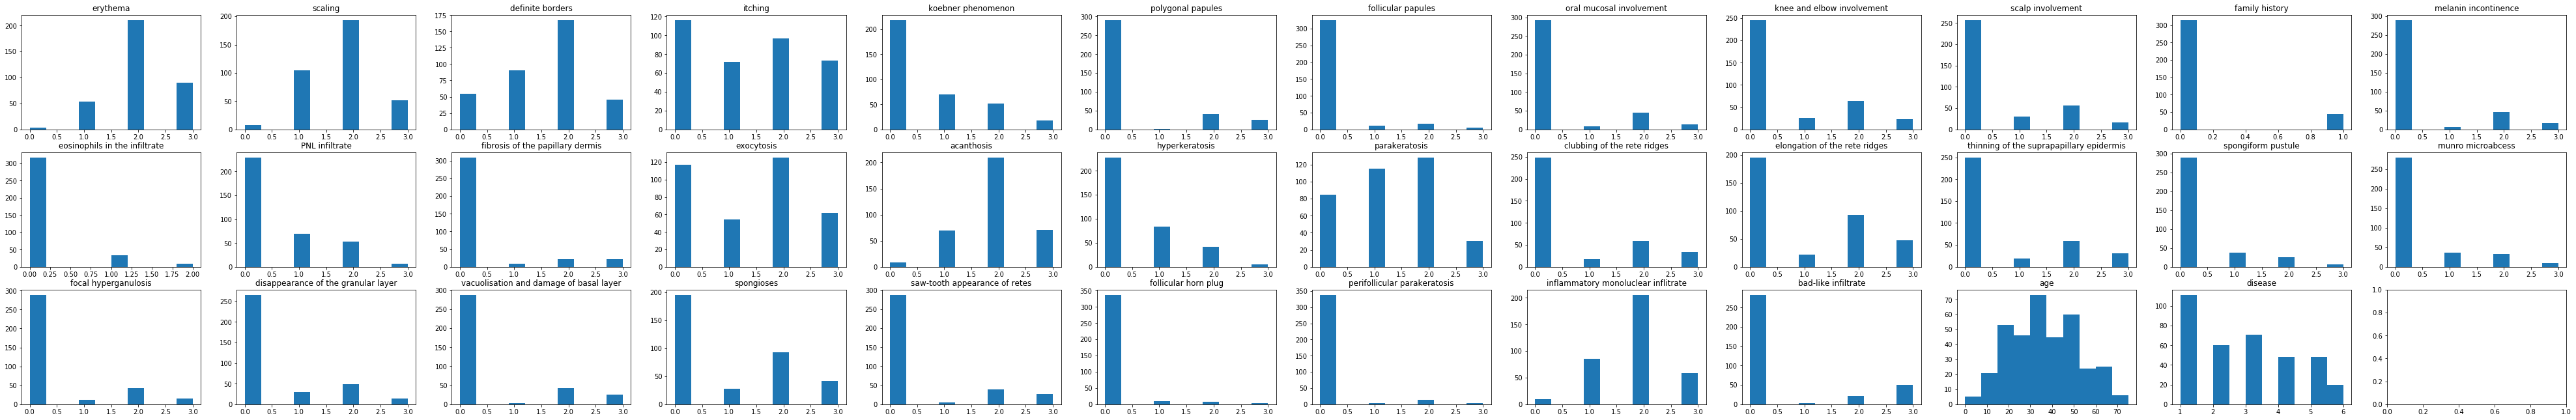

In [35]:
#plot histograms of features

fig, axes = plt.subplots(3, round(len(data.columns)/3))
fig.set_figwidth(len(data.columns)*2)
fig.set_figheight(len(data.columns)//3)
axes = axes.flatten()

for i, col in enumerate(data.columns):
  axes[i].hist(data[col])
  axes[i].set_title(col)


In [36]:
# top 5 frequencies of age values
data['age'].value_counts()[:5]

40    17
50    17
27    16
36    16
22    15
Name: age, dtype: int64

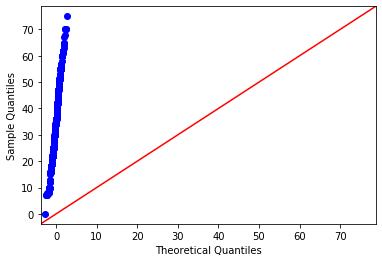

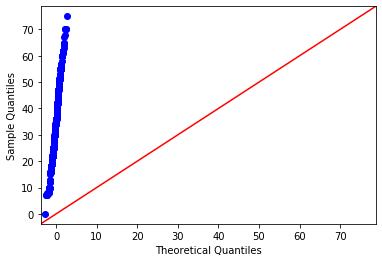

In [37]:
#qq plot to measure skewedness of age variable
sm.qqplot(data['age'], line = '45')

(40, 78.75)

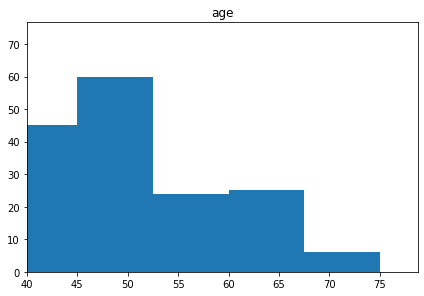

In [38]:
# histogram to see distribution of age feature
plt.hist(data['age'])
plt.tight_layout()
plt.title('age')
plt.xlim(40)

Text(0.5, 1.0, 'distribution of diseases')

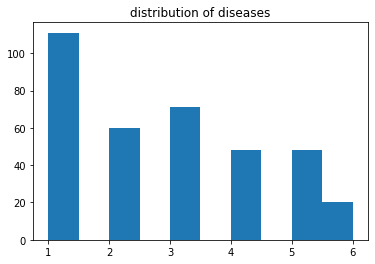

In [39]:
#see balance of dataset (disease feature is the target)

plt.hist(data['disease'])
plt.title('distribution of diseases')


In [40]:
data['disease'].value_counts()

1    111
3     71
2     60
5     48
4     48
6     20
Name: disease, dtype: int64

# Model Fitting #

In [41]:
X = data[data.columns[:-1]]
y = data[data.columns[-1]]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=39)

# Decision Tree #


In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
help(GridSearchCV)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  GridSearchCV(estimator, param_grid, scoring=None, n_jobs=None, iid='deprecated', refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
 |  
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "predict", "predict_proba", "decision_function",
 |  "transform" and "inverse_transform" if they are implemented in the
 |  estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object.
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either esti

In [45]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats = 3, random_state = 4)
param_grid = dict(max_depth=list(range(1,25)))

clf = DecisionTreeClassifier(random_state = 20)
search = GridSearchCV(clf, param_grid, scoring = 'accuracy', cv = cv)
result = search.fit(X, y)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.9497883597883596
Best Hyperparameters: {'max_depth': 8}


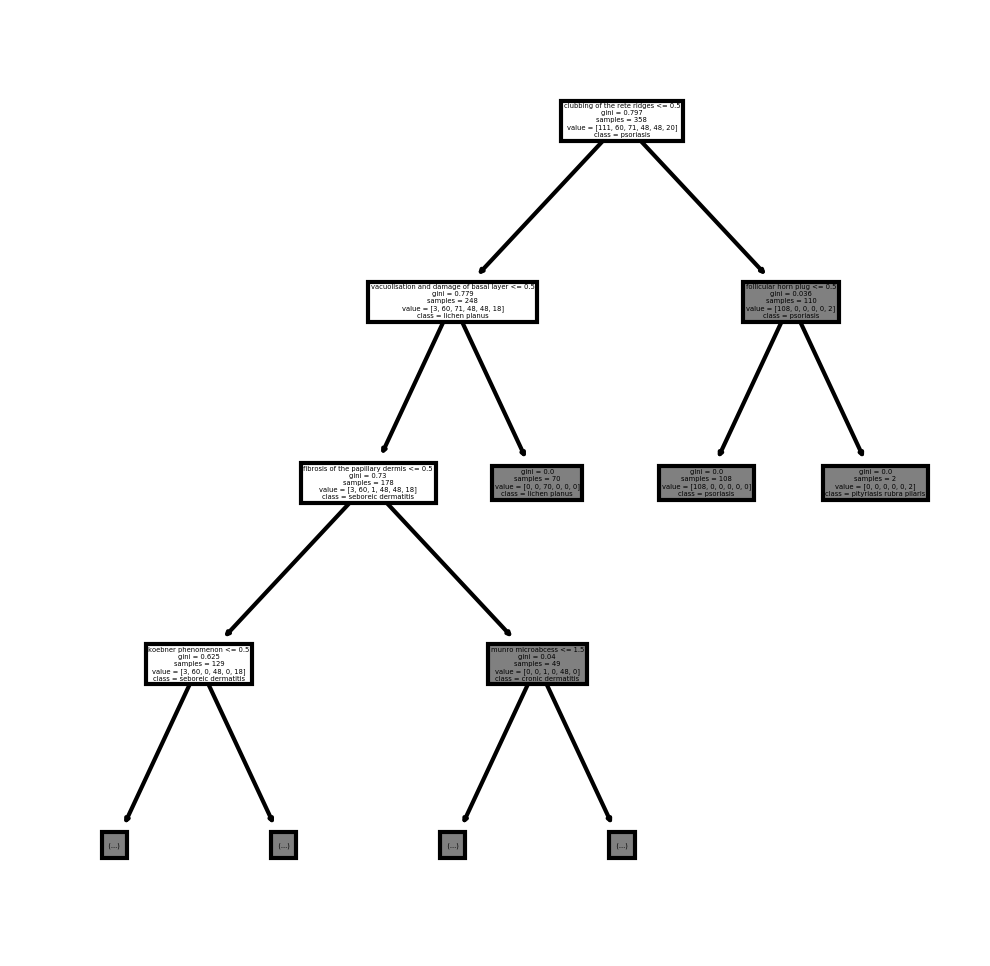

In [59]:
fn = ["erythema", "scaling", "definite borders", "itching", "koebner phenomenon", "polygonal papules", "follicular papules", "oral mucosal involvement", "knee and elbow involvement", "scalp involvement", "family history", "melanin incontinence", "eosinophils in the infiltrate", "PNL infiltrate", "fibrosis of the papillary dermis", "exocytosis", "acanthosis", "hyperkeratosis", "parakeratosis", "clubbing of the rete ridges", "elongation of the rete ridges", "thinning of the suprapapillary epidermis", "spongiform pustule", "munro microabcess", "focal hyperganulosis", "disappearance of the granular layer", "vacuolisation and damage of basal layer", "spongioses", "saw-tooth appearance of retes", "follicular horn plug", "perifollicular parakeratosis", "inflammatory monoluclear inflitrate", "bad-like infiltrate", "age"]
cn = ["psoriasis", "seboreic dermatitis", "lichen planus", "pityriasis rosea", "cronic dermatitis", "pityriasis rubra pilaris"]

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300);
tree.plot_tree(clf, feature_names = fn, class_names = cn, max_depth = 3);

# Random Forest #


In [62]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats = 3, random_state = 4)
distributions = dict(max_depth=list(range(1,25)), n_estimators= list(range(1,100)))

rfc = RandomForestClassifier(random_state=1)

search = RandomizedSearchCV(rfc, distributions, n_iter = 250, scoring = 'accuracy', n_jobs = -1,  cv = cv, random_state = 12)
result = search.fit(X, y)



In [63]:
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.9823809523809522
Best Hyperparameters: {'n_estimators': 69, 'max_depth': 8}
